# Full Chip Designs of iSWAP Gates 

In this demo notebook, we'll go through the physical designs of three examples of iSWAP gates based on published reports in the literature. Full physical design includes the two (or more) qubits making up the iSWAP gate as well as all CPW resonators, terminations and couplers. 

The three specific designs that we'll go through can be found here:
1. Phys. Rev. Appl. 10, 034050 (2018) - iSWAP gate based on one fixed-frequency qubit and one qubit with a flux-tunable frequency.  
2. Phys. Rev. Research 2, 033447 (2020) - iSWAP gate based on two fixed-frequency qubits and a tunable coupler
3. Phys. Rev. X 11, 021058 (2021) - iSWAP gate based on two fixed-frequency X-mon qubits and an interdigitated tunable coupler. 



In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import warnings
warnings.filterwarnings('ignore')

### Example #1: One fixed-frequency qubit and one flux-tunable qubit 

For this iSWAP gate design, we'll need to import the concentric qubits used in the design as well as unique lumped resonators, straight transmission lines and launch pads:

In [2]:
from qiskit_metal.qlibrary.qubits.transmon_concentric_type_2 import TransmonConcentricType2
from qiskit_metal.qlibrary.resonator.resonator_lumped import ResonatorLumped
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

Let's first instantiate the six custom components; the two qubits, two launch pads and two lumped resonators: 

In [4]:
design.overwrite_enabled = True
q1 = TransmonConcentricType2(design, 'qubit1', options=dict(pos_x='0.0mm',orientation='-45'))
q2 = TransmonConcentricType2(design, 'qubit2', options=dict(pos_y='10.0mm',orientation='135'))
res1 = ResonatorLumped(design, 'resonator1', options=dict(pos_x='10.0mm', pos_y='10.0mm',orientation='-45'))
res2 = ResonatorLumped(design, 'resonator2', options=dict(pos_x='-10.0mm', pos_y='0.0mm',orientation='45'))

pad1 = LaunchpadWirebond(design, 'P1_C', options = dict(pos_x='0mm', pos_y='-5mm', orientation='90',
                                                        pad_width='0.5mm', pad_height='1mm', lead_length='0um'))

pad2 = LaunchpadWirebond(design, 'P2_C', options = dict(pos_x='-13mm', pos_y='-5mm', orientation='90',
                                                        pad_width='0.5mm', pad_height='1mm', lead_length='0um'))

pad3 = LaunchpadWirebond(design, 'P3_C', options = dict(pos_x='15mm', pos_y='7mm', orientation='180',
                                                        pad_width='0.5mm', pad_height='1mm', lead_length='0um'))
gui.rebuild()
gui.autoscale()

Now let's connect everything with CPWs:

In [5]:
design.variables['cpw_width'] = '0.1mm'

# Connect the two qubits
route1 = RouteStraight(design, 'route1', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='qubit1',pin='pin2'),
                                end_pin=Dict(component='qubit2',pin='pin2')),
                                       lead=Dict(start_straight='0.0mm',end_straight='0.0mm')))

# Connect top qubit to lumped resonator
route2 = RouteStraight(design, 'route2', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='resonator1',pin='pin_sw'),
                                end_pin=Dict(component='qubit2',pin='pin3')),
                                       lead=Dict(start_straight='0.0mm',end_straight='0.0mm')))

# Connect bottom qubit to lumped resonator
route3 = RouteStraight(design, 'route3', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='resonator2',pin='pin_se'),
                                end_pin=Dict(component='qubit1',pin='pin3')),
                                       lead=Dict(start_straight='0.0mm',end_straight='0.0mm')))

# Connect top lumped resonator to launch pad
route4 = RouteStraight(design, 'route4', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='resonator1',pin='pin_east'),
                                end_pin=Dict(component='P3_C',pin='tie')),
                                       lead=Dict(start_straight='1mm',end_straight='0.0mm')))

# Connect bottom lumped resonator to launch pad
route5 = RouteStraight(design, 'route5', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='resonator2',pin='pin_west'),
                                end_pin=Dict(component='P2_C',pin='tie')),
                                       lead=Dict(start_straight='1mm',end_straight='0.0mm')))

from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
otg11 = OpenToGround(design, 'open1i', options=dict(pos_x='0mm',  pos_y='-2.5mm', orientation='90'))

# Connect bottom qubit to launch pad
route5 = RouteStraight(design, 'route6', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='open1i',pin='open'),
                                end_pin=Dict(component='P1_C',pin='tie')),
                                       lead=Dict(start_straight='0mm',end_straight='0.0mm')))


gui.rebuild()
gui.autoscale()

And we're done! Here's a look at the final full chip design:

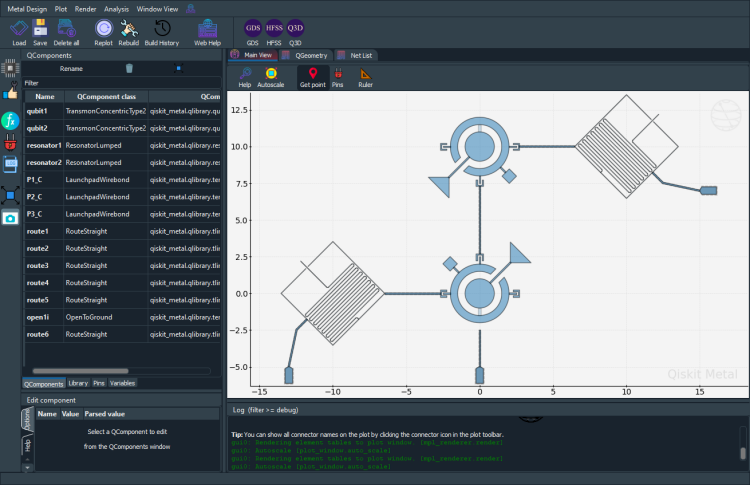

In [6]:
gui.screenshot()

### Example #2: Two fixed-frequencies transmon qubits and flux-tunable coupler 

First let's delete the existing objects from the previous design: 

In [7]:
design.delete_all_components()
gui.rebuild()
gui.autoscale()

Now let's instantiate the six components used in this design: two transmon pocket qubits, a flux tunable qubit and three launch pads:

In [8]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6
from qiskit_metal.qlibrary.couplers.tunable_coupler_02 import TunableCoupler02
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

In [9]:
Q1 = TransmonPocket6(design,'Q1', options = dict(
        pos_x='-4mm', 
        pos_y='0.0mm',
        orientation='90',
        pad_width='1mm',
        pad_height='0.4mm',
        pocket_width='1.5mm',
        pocket_height='1.2mm',
        pad_gap='0.05mm',
        connection_pads = dict(
            bus_03 = dict(loc_W=0, loc_H=-1, pad_width = '100um', pad_gap = '50um'),
            readout = dict(loc_W=0, loc_H=1, pad_width = '100um', pad_gap = '50um'))))

Q2 = TransmonPocket6(design,'Q2', options = dict(
        pos_x='4mm', 
        pos_y='0.0mm',
        orientation='90',
        pad_width='1mm',
        pad_height='0.4mm',
        pocket_width='1.5mm',
        pocket_height='1.2mm',
        pad_gap='0.05mm',
        connection_pads = dict(
            bus_03 = dict(loc_W=0, loc_H=-1, pad_width = '100um', pad_gap = '50um'),
            readout = dict(loc_W=0, loc_H=1, pad_width = '100um', pad_gap = '50um'))))


TC = TunableCoupler02(design, 'TC')

pad1 = LaunchpadWirebond(design, 'P1_C', options = dict(pos_x='-7mm', pos_y='0.5mm', orientation='90',
                                                        pad_width='0.5mm', pad_height='1mm', lead_length='0um'))

pad2 = LaunchpadWirebond(design, 'P2_C', options = dict(pos_x='7mm', pos_y='0.5mm', orientation='90',
                                                        pad_width='0.5mm', pad_height='1mm', lead_length='0um'))

pad3 = LaunchpadWirebond(design, 'P3_C', options = dict(pos_x='3mm', pos_y='3mm', orientation='-180',
                                                        pad_width='0.5mm', pad_height='1mm', lead_length='0um'))
gui.rebuild()
gui.autoscale()

Now we can connect all of the components with CPWs:

In [10]:
design.variables['cpw_width'] = '0.01mm'

# Connect the two qubits
route1 = RouteStraight(design, 'route1', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='Q1',pin='bus_03'),
                                end_pin=Dict(component='TC',pin='pin2')),
                                       lead=Dict(start_straight='0.0mm',end_straight='0.0mm')))

route2 = RouteStraight(design, 'route2', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='Q2',pin='readout'),
                                end_pin=Dict(component='TC',pin='pin1')),
                                       lead=Dict(start_straight='0.0mm',end_straight='0.0mm')))

route3 = RouteStraight(design, 'route3', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='P3_C',pin='tie'),
                                end_pin=Dict(component='TC',pin='fbl')),
                                       lead=Dict(start_straight='3.4mm',end_straight='0.0mm'),
                                   fillet='90um'))

route4 = RouteMeander(design, 'route4', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='Q1',pin='readout'),
                                end_pin=Dict(component='P1_C',pin='tie')),
                                       lead=Dict(start_straight='0mm',end_straight='0.5mm'), 
                                   meander=Dict(asymmetry='0mm'),
                                   total_length='10mm',
                                   fillet='90um'))

route5 = RouteMeander(design, 'route5', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='Q2',pin='bus_03'),
                                end_pin=Dict(component='P2_C',pin='tie')),
                                       lead=Dict(start_straight='0mm',end_straight='0.5mm'), 
                                   meander=Dict(asymmetry='0mm'),
                                   total_length='10mm',
                                   fillet='90um'))

gui.rebuild()
gui.autoscale()

01:54PM 12s WARNING [check_lengths]: For path table, component=route3, key=trace has short segments that could cause issues with fillet. Values in (2-2)  are index(es) in shapely geometry.
01:54PM 12s WARNING [check_lengths]: For path table, component=route3, key=cut has short segments that could cause issues with fillet. Values in (2-2)  are index(es) in shapely geometry.
01:54PM 12s WARNING [check_lengths]: For path table, component=route4, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
01:54PM 12s WARNING [check_lengths]: For path table, component=route4, key=cut has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
01:54PM 12s WARNING [check_lengths]: For path table, component=route5, key=trace has short segments that could cause issues with fillet. Values in (1-1)  are index(es) in shapely geometry.
01:54PM 12s WARNING [check_lengths]: For path table, compon

Here's a look at the final, complete design:

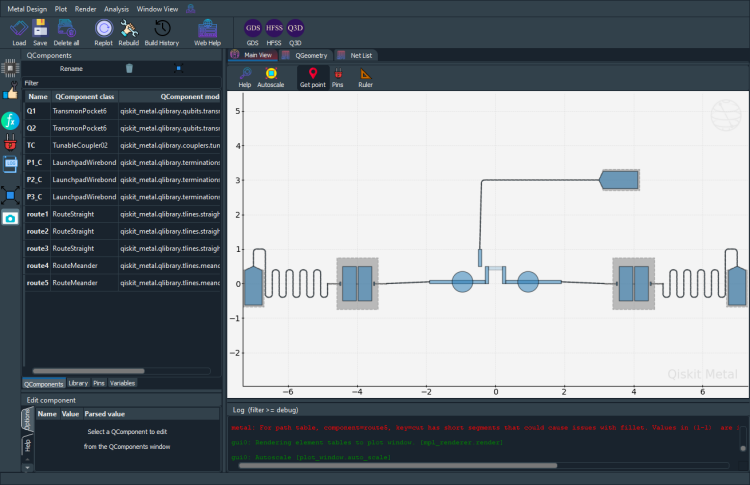

In [11]:
gui.screenshot()

The above design closely matches the chip design depicted in Fig. 1 of Phys. Rev. Research 2, 033447 (2020). 

### Example #3: Two Fixed-Frequency Xmon Qubits with a Tunable Coupler 

This third example is similar to the preceeding 3-qubit design but uses Xmon qubits (instead of transmon pocket qubits) and in interdigitated capacitive coupler. We will again start by deleting the previous design. 

In [12]:
design.delete_all_components()
gui.rebuild()
gui.autoscale()

In [13]:
from qiskit_metal.qlibrary.couplers.tunable_coupler_01 import TunableCoupler01
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

In [14]:
design.overwrite_enabled = True
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

We will first place the two X-mon qubits with the flux-tunable coupler located between them:

In [15]:
xmon_options1 = dict(
    connection_pads=dict(
        #a = dict( connector_location = '0', connector_type = '0'), 
        b = dict(connector_location = '90', connector_type = '1'),
        c = dict(connector_location = '180', connector_type = '0'),
    ),
    pos_x='0.3mm',
)

xmon_options2 = dict(
    connection_pads=dict(
        #a = dict( connector_location = '0', connector_type = '0'), 
        b = dict(connector_location = '90', connector_type = '1'),
        c = dict(connector_location = '180', connector_type = '0'),
    ),
    pos_x='-0.3mm',
    orientation='180',
)

# Create a new Transmon Cross object with name 'Q1' 
q1 = TransmonCrossFL(design, 'Q1', options=xmon_options1)
q2 = TransmonCrossFL(design, 'Q2', options=xmon_options2)

TC = TunableCoupler01(design, "TC", options = dict(pos_y='0.15mm', a_height='100um'))

gui.rebuild()
gui.autoscale()

Next, we will place the launch pads:

In [16]:
T_west = LaunchpadWirebond(design, 'T_west', options=dict(
    pos_x='-1.5mm',
    pos_y='0.0mm',
))

T_east = LaunchpadWirebond(design, 'T_east', options=dict(
    pos_x='1.5mm',
    pos_y='0.0mm',
    orientation='180',
))

T_NE = LaunchpadWirebond(design, 'T_NE', options=dict(
    pos_x='0.5mm',
    pos_y='1mm',
    orientation='-90',
))

T_NW = LaunchpadWirebond(design, 'T_NW', options=dict(
    pos_x='-0.5mm',
    pos_y='1mm',
    orientation='-90',
))

T_SW = LaunchpadWirebond(design, 'T_SW', options=dict(
    pos_x='-0.5mm',
    pos_y='-1mm',
    orientation='90',
))

T_SE = LaunchpadWirebond(design, 'T_SE', options=dict(
    pos_x='0.5mm',
    pos_y='-1mm',
    orientation='90',
))

gui.rebuild()
gui.autoscale()

Next we'll import the relevant routing modules:

In [ ]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed

We'll create the straight routing segments first, which connect the top/bottom launch pads with the qubits and coupler:

In [ ]:
route1 = RouteStraight(design, 'cpw_1', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='Q1',pin='flux_line'),
                                end_pin=Dict(component='T_SE',pin='tie')),
                                       lead=Dict(start_straight='0.25mm',end_straight='0.25mm')))

route2 = RouteStraight(design, 'cpw_2', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='Q2',pin='b'),
                                end_pin=Dict(component='T_SW',pin='tie')),
                                       lead=Dict(start_straight='0.25mm',end_straight='0.25mm')))

route3 = RouteStraight(design, 'cpw_3', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='Q1',pin='b'),
                                end_pin=Dict(component='T_NE',pin='tie')),
                                       lead=Dict(start_straight='0.25mm',end_straight='0.25mm')))

route4 = RouteStraight(design, 'cpw_4', 
                       options=Dict(pin_inputs=Dict(start_pin=Dict(component='TC',pin='Flux'),
                                end_pin=Dict(component='T_NW',pin='tie')),
                                       lead=Dict(start_straight='0.25mm',end_straight='0.25mm')))

gui.rebuild()
gui.autoscale()

Next we'll create the east-west transmission line connecting the east/west launch pads:

In [ ]:
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["R", '0.5mm']
jogs[1] = [45, '0.5mm']
jogs[2] = [45, '1.75mm']
jogs[3] = [45, '0.5mm']
jogs[4] = [45, '0.5mm']
jogs[5] = ["R", '0.5mm']

options = Dict(
    total_length= '4.75mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'T_east',
            pin= 'tie'),
        end_pin=Dict(
            component= 'T_west',
            pin= 'tie')),
    lead=Dict(
        start_straight='0.25mm',
        end_straight='0.1mm',
        start_jogged_extension=jogs),
        #start_jogged_extension=jogs,
        #end_jogged_extension=jogs),
    meander=Dict(
       asymmetry='0.0mm')
)


cpw5 = RouteMeander(design,'tline', options=options)
#cpw5 = RouteStraight(design,options=options)
gui.rebuild()
gui.autoscale()

Some of the CPWs are capacitively coupled to the main transmission line, so we will create several open-to-grounds at the appropriate locations for our CPWs to terminate:

In [ ]:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
otg1 = OpenToGround(design, 'open1', options=dict(pos_x='0.25mm',  pos_y='0.8mm', orientation='0'))
otg2 = OpenToGround(design, 'open2', options=dict(pos_x='1.1mm',  pos_y='0.0mm', orientation='-90'))
otg3 = OpenToGround(design, 'open3', options=dict(pos_x='-1.1mm',  pos_y='0.0mm', orientation='90'))
gui.rebuild()
gui.autoscale()

Now we can route the meandering CPWs to create the capacitive coupling between the qubits/coupler and the main transmission line:

In [ ]:
options2 = Dict(
    fillet='40um',
    total_length= '1.5mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'TC',
            pin= 'Control'),
        end_pin=Dict(
            component= 'open1',
            pin= 'open')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight='0.1mm'),
    meander=Dict(
        spacing='90um',
        asymmetry='0mm')
)

coupler_middle = RouteMeander(design,'coupler_mid', options=options2)

options_right = Dict(
    fillet='40um',
    total_length= '2mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q1',
            pin= 'c'),
        end_pin=Dict(
            component= 'open2',
            pin= 'open')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight='0.1mm'),
    meander=Dict(
        spacing='90um',
        asymmetry='0mm')
)

coupler_right = RouteMeander(design,'coupler_right', options=options_right)

options_left = Dict(
    fillet='40um',
    total_length= '2mm',
    pin_inputs=Dict(
        start_pin=Dict(
            component= 'Q2',
            pin= 'c'),
        end_pin=Dict(
            component= 'open3',
            pin= 'open')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight='0.1mm'),
    meander=Dict(
        spacing='90um',
        asymmetry='0mm')
)

coupler_left = RouteMeander(design,'coupler_left', options=options_left)

gui.rebuild()
gui.autoscale()

Now the full chip design is complete. Here is a screenshot of the final design:

In [ ]:
gui.screenshot()

The above design looks very similar to the chip shown in Fig. 1 of Phys. Rev. X 11, 021058 (2021.)